In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

Here we will be learning how to plot a pie chart as well as the best scenarios to use these visuals.

- plt.pie()

contains parameters such as x (list of values representing each slice), labels, colors etc.


In the example below, we will be plotting boolean values from the 'job_work_from_home' column, which has 2 values and this is good for pie charts

In [48]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parame

In [2]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

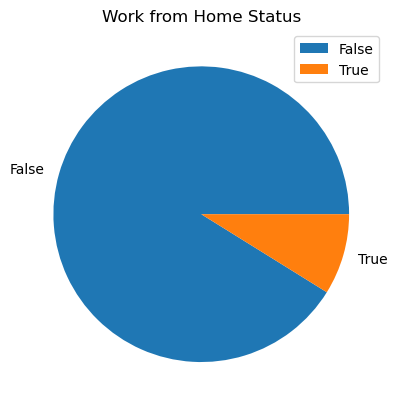

In [8]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work from Home Status')
plt.ylabel('')
plt.legend().set_visible(True)
plt.show()

We can further customise this chart by defining:

- the starting angle:  we want to set as the top centre portion so that the 'True' portion is orientated at the top. This can be done by specifying the '**startangle**' argument and then passing an angle value.
- the percentages for both values: we specify '**autopct**' and equate this to a format specification minilanguage (%1.1f%%). f specfies a float.

Note: the reference point (0 degrees) starts on the right centred side of the pie chart.


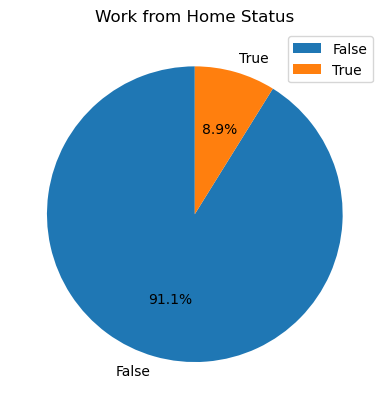

In [22]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.legend().set_visible(True)
plt.show()

## Task

We have 3 different columns that provide boolean values:
- job_work_from_home
- job_no_degree_mention
- job_health_insurance

Lets say we want to create a figure with all 3 pie charts

In [25]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']].head()

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False


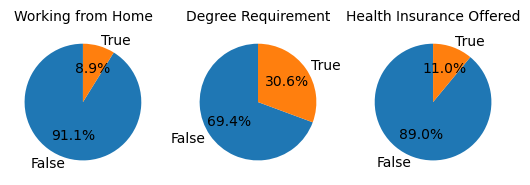

In [47]:
fig, ax = plt.subplots(1,3)

ax[0].pie(df['job_work_from_home'].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
ax[1].pie(df['job_no_degree_mention'].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
ax[2].pie(df['job_health_insurance'].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])

ax[0].set_title('Working from Home', fontsize=10)
ax[1].set_title('Degree Requirement', fontsize=10)
ax[2].set_title('Health Insurance Offered', fontsize=10)

plt.show()
# Note: labels must be written in the correct order, so double-check values

Now the method shown above is one way to plot this, but this is an alternative way of plotting these charts in the same figure by enumarating through a dictionary this time, which contains the relelvant column and plot titles organized as key:value pairs.

0 job_work_from_home Working from Home
1 job_no_degree_mention Degree Requirement
2 job_health_insurance Health Insurance Offered


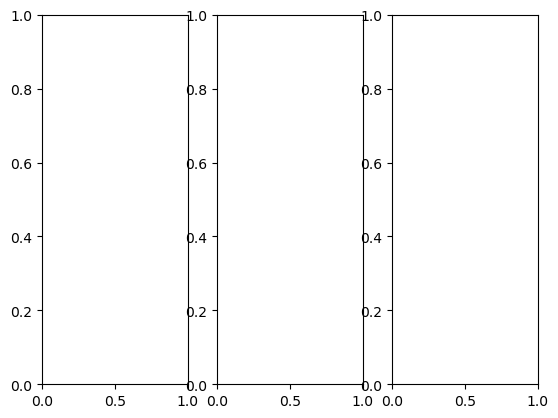

In [50]:
fig, ax = plt.subplots(1,3)

dict_pie = {
'job_work_from_home':'Working from Home',
'job_no_degree_mention':'Degree Requirement',
'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_pie.items()):
    print(i, column, title)

# dict_pie.items is used to retrieve both the keys and values as pairs
# we add (column, title) as we expect a tuple (key:value) pair in return 
# here, we get an index (i), the key (column) and the value (title)
# we can now assign the index for the axes object, the column to specify the specific df[column]
# to retrieve counts for a given axes object, and the title for each pie chart

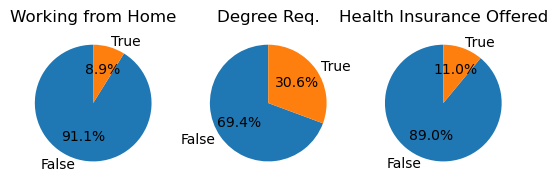

In [52]:
fig, ax = plt.subplots(1,3)

dict_pie = {
'job_work_from_home':'Working from Home',
'job_no_degree_mention':'Degree Req.',
'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_pie.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

## When not to use  a pie chart

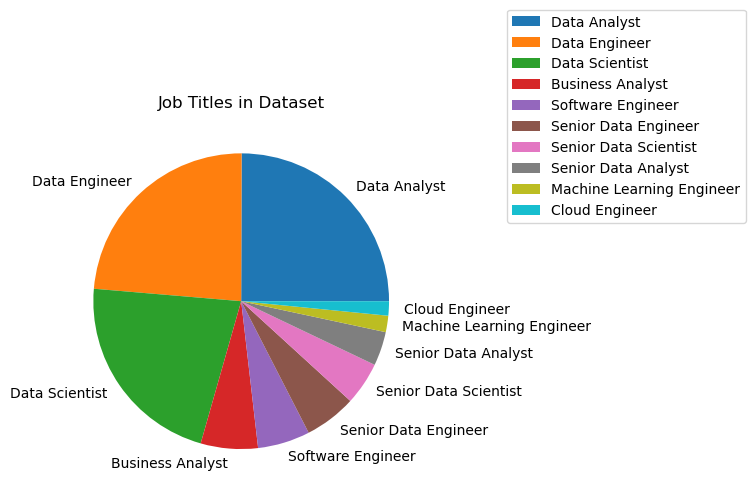

In [16]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles in Dataset')
plt.ylabel('')
plt.legend().set_visible(True)
plt.legend(loc="center left", bbox_to_anchor=(1.2, 1)) # moves legend away from the centre
plt.show()

In this instance, where a column has numerous values, it isn't feasible to see the differences in job postings between different job types. Here, a bar graph would be more appropriate for this. If we have more than 3-4 values, perhaps a bar chart would be more suitable.